**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 2**
Pandas para el análisis de datos en Python

---

*   NOMBRE: Caporal Montes de Oca Luis Fernando
*   MATRÍCULA: A01795898


---

En esta actividad usarás el archivo de datos `LaqnData.csv`. Cada fila de este conjunto de datos muestra un registro de medición, por hora, de uno de los siguientes cinco contaminantes del aire:

*   `NO` (óxido nítrico)
*   `NO2` (dióxido de nitrógeno)
*   `NOX` (óxidos nitrosos)
*   `PM10` (partículas suspendidas con un diámetro aerodinámico igual o menor a 10 micrómetros)
*   `PM2.5` (partículas suspendidas con un diámetro aerodinámico igual o menor a 2.5 micrómetros)

Los datos se recopilaron en una ubicación de Londres durante todo el año 2017.

**NOTA IMPORTANTE:** Asegúrate de responder *explícitamente* todos los cuestionamientos.


1.	Descarga el archivo: `LaqnData.csv` y guarda, en un dataframe (`air_df`), todos sus registros.
*   Observa la estructura y contenido del dataframe con los atributos y métodos estudiados (`shape`, `columns`, `head()`, `tail()`, `dtypes`, `insa()`)
*   Calcula el porcentaje de valores faltantes por columna.

In [1]:
# Importación de la libreria
import pandas as pd

# Carga del archivo
file = 'LaqnData.csv'
air_df = pd.read_csv(file)

n,m = air_df.shape
columns = list(air_df.columns)
des = air_df.dtypes

# Mapper útil para imprimir el tipo de dato de acuerdo a dtypes markdown
mapper = {'O': 'string', 'f': 'float64'}

# Uso de f-strings para hacer la descripción desde código y no desde 
print(f'Los anteriores métodos sirvieron para conocer que el archivo {file}' 
      f' tiene {n} observaciones (filas) y {m} categorias (columnas), las cuales son:')
print('')

# Iteación sobre cada columna para parsear el value y tipo de dato usando el mapper
for category in columns:
    # dummy variable
    x = air_df.isna()
    # Porcentaje redondeado a 3 decimales para cada columna
    p = round(len(x[x[category]==True])*100/n,3)
    # Despliegue del mensaje
    print(f'{category}:', mapper[des[category].kind], f'| Porcentage de datos faltantes: {p} %')


Los anteriores métodos sirvieron para conocer que el archivo LaqnData.csv tiene 43800 observaciones (filas) y 6 categorias (columnas), las cuales son:

Site: string | Porcentage de datos faltantes: 0.0 %
Species: string | Porcentage de datos faltantes: 0.0 %
ReadingDateTime: string | Porcentage de datos faltantes: 0.0 %
Value: float64 | Porcentage de datos faltantes: 7.374 %
Units: string | Porcentage de datos faltantes: 0.0 %
Provisional or Ratified: string | Porcentage de datos faltantes: 0.0 %


Primeras 5 filas:

In [2]:
air_df.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,CT3,NO,01/01/2017 00:00,3.5,ug m-3,R
1,CT3,NO,01/01/2017 01:00,3.6,ug m-3,R
2,CT3,NO,01/01/2017 02:00,2.2,ug m-3,R
3,CT3,NO,01/01/2017 03:00,2.1,ug m-3,R
4,CT3,NO,01/01/2017 04:00,3.3,ug m-3,R


Últimas 5 filas:
(Con lo cual podemos ver que las filas aparentan estar ordenadas de forma de ascendente con ReadingDateTime)

In [3]:
air_df.tail()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
43795,CT3,PM2.5,31/12/2017 19:00,-2.0,ug m-3,R
43796,CT3,PM2.5,31/12/2017 20:00,6.0,ug m-3,R
43797,CT3,PM2.5,31/12/2017 21:00,5.0,ug m-3,R
43798,CT3,PM2.5,31/12/2017 22:00,5.0,ug m-3,R
43799,CT3,PM2.5,31/12/2017 23:00,6.0,ug m-3,R


2.	Obtén la cantidad de valores únicos por columna (`nunique()`) para responder:


*   ¿Cuántas mediciones se hicieron?
*   ¿Cuántos contaminantes del aire (`Species`) se analizaron?
*   ¿Qué columnas no agregan ningún valor informativo porque es el mismo valor en todo el conjunto de datos? Elimínalas del dataframe.
*   La columna `Units` tampoco posee valor informativo. Verifícalo con la función `unique()` y elimínala del dataframe.

In [4]:
print(f'Se hicieron {air_df.ReadingDateTime.nunique()} mediciones.')
print(f'Se analizaron {air_df.Species.nunique()} contaminantes del aire: {list(air_df.Species.unique())}')

# Ciclo para obtener columnas sin valor informativo (son contantes)
no_informatives = []
for category in columns:
    if air_df[category].nunique() == 1:
        no_informatives.append(category)

print()
print(f'Mientras que las columnas sin valor informativo porque son constantes son: {no_informatives}')
print(f'Si bien Units posee más de un valor: {list(air_df.Units.unique())} se nos indica que no es informativa')
# Agregamos a la black list
no_informatives.append('Units')

# Sobreescritura de la variable para eliminar las solicitadas
air_df = air_df.drop(no_informatives, axis=1)

Se hicieron 8760 mediciones.
Se analizaron 5 contaminantes del aire: ['NO', 'NO2', 'NOX', 'PM10', 'PM2.5']

Mientras que las columnas sin valor informativo porque son constantes son: ['Site', 'Provisional or Ratified']
Si bien Units posee más de un valor: ['ug m-3', 'ug m-3 as NO2', 'ug/m3'] se nos indica que no es informativa


3.	Realiza el conteo de valores por categoría (`value_counts()`) para la columna `Species` y determina si las lecturas de cada contaminante coincide con el total de mediciones.

In [5]:
contaminants = air_df['Species'].unique()

for contaminant in contaminants:
    l = air_df['Species'].value_counts()[contaminant]
    if l == air_df.ReadingDateTime.nunique():
        print(f'{contaminant}: {l} | Concuerda con el conteo de total de mediciones ')
    else:
        print(f'{contaminant}: {l} | No concuerda con el conteo de total de mediciones ')



NO: 8760 | Concuerda con el conteo de total de mediciones 
NO2: 8760 | Concuerda con el conteo de total de mediciones 
NOX: 8760 | Concuerda con el conteo de total de mediciones 
PM10: 8760 | Concuerda con el conteo de total de mediciones 
PM2.5: 8760 | Concuerda con el conteo de total de mediciones 


4.	Utiliza la función `groupby()` para determinar el promedio del valor por contaminante.

In [6]:
# Copia de la data original para llenar con 0 los valores faltantes identificados en el primer punto
data_copy = air_df.copy()
data_copy['Value'] = data_copy['Value'].fillna(0)

# Lo anterior fue para verificar que si llenamos con cero, el promedio baja, por el que pandas excluye del calculo 
# aquelas filas con 'Value' en nulo

x = air_df # x = data_copy # Si quiere verificar dicho efecto

for contaminant in contaminants:
    d = x.groupby('Species')['Value'].mean()[contaminant]
    print(f'{contaminant}. Promedio: {round(d,3)}')

NO. Promedio: 15.045
NO2. Promedio: 38.01
NOX. Promedio: 61.079
PM10. Promedio: 22.552
PM2.5. Promedio: 15.0


5.	El conjunto de datos está en un formato largo. Aplique la función apropiada para cambiarlo al formato ancho (`ReadingDateTime` como índice y cada contaminante en una columna). Nombre el dataframe resultante como `pvt_df`.

In [7]:
pvt_df = air_df.pivot(index='ReadingDateTime', columns='Species', values='Value')

6.	A través de la función `describe()` responde:

*   ¿Cuál es el mayor valor de `NO2` registrado? ¿A qué día pertenece?
*   ¿Cuál es el menor valor de `PM10` registrado?¿A qué día pertenece?
*   ¿Cuál es la mediana del `NO`? ¿Cómo se interpreta?
*   ¿Cuál es el primer cuartil de `PM2.5`? ¿Qué significa?

In [8]:
value = pvt_df.describe()['NO2']['max']
index = pvt_df[pvt_df['NO2']==value].index[0]
aux = index.split(" ")

print(f'El mayor valor de NO2 registrado es de {value}, registrado el {aux[0]} a las {aux[1]}')

value = pvt_df.describe()['PM10']['min']
index = pvt_df[pvt_df['PM10']==value].index[0]
aux = index.split(" ")

print(f'El menor valor de PM10 registrado es de {value}, registrado el {aux[0]} a las {aux[1]}')


print('')
# El método describe no tiene la mediana, solo la median
m = pvt_df.median().NO
print(f'La mediana de NO es {m}, Nos indica que la mitad de los datos son mayores (o iguales) a {m}'
      f'y la otra mitad menores (o iguales) a {m}. Por ende se considera medida de tendencia central')

print('')
q = pvt_df.describe()['PM2.5']['25%']
print(f'El primer cuartil de PM2.5 es {q}, lo que significa que el 25% de los datos son menores o iguales a {q}')

El mayor valor de NO2 registrado es de 120.2, registrado el 24/01/2017 a las 19:00
El menor valor de PM10 registrado es de -5.6, registrado el 12/09/2017 a las 23:00

La mediana de NO es 7.1, Nos indica que la mitad de los datos son mayores (o iguales) a 7.1y la otra mitad menores (o iguales) a 7.1. Por ende se considera medida de tendencia central

El primer cuartil de PM2.5 es 7.0, lo que significa que el 25% de los datos son menores o iguales a 7.0


7.	Dibuja un histograma para cada columna de `pvt_df`. ¿Qué contaminante tiene mayor variabilidad?

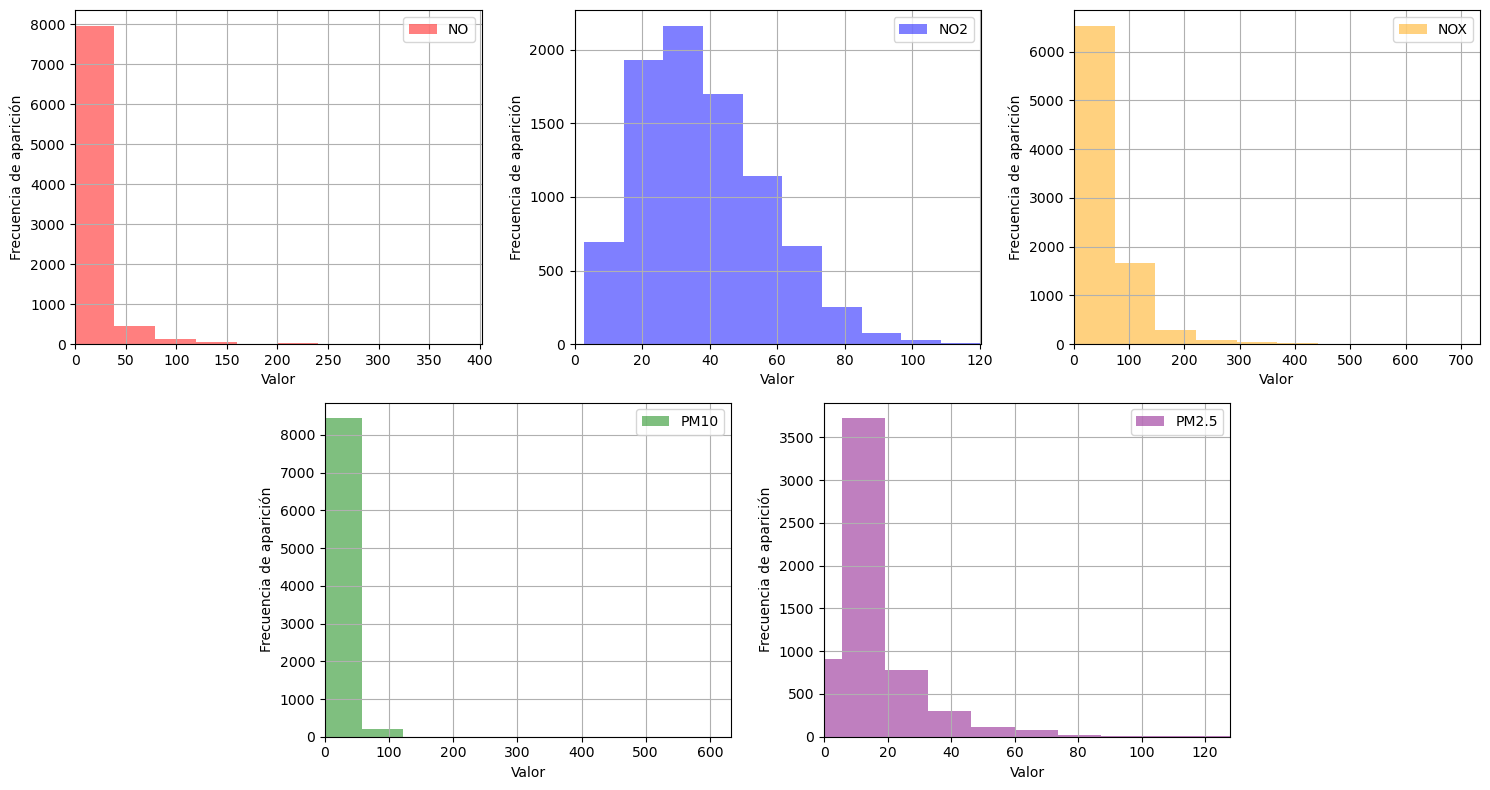

In [9]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd

fig = plt.figure(figsize=(15, 8))
gs = gridspec.GridSpec(2, 6) 

colors = ['red', 'blue', 'orange', 'green', 'purple']
total_columns = gs.get_geometry()[1]

for i in range(0, 5): 
    if i < 3: # Las subparcelas de arriba las ploteo normal
        ax = plt.subplot(gs[0, 2 * i:2 * i + 2])
    else: # Para las de abajo calculo la posición correcta
        width_of_bottom_plots = 2 * (5 - 3) 
        start_col = (total_columns - width_of_bottom_plots) // 2 + (i - 3) * 2  
        end_col = start_col + 2 
        ax = plt.subplot(gs[1, start_col:end_col])

    # Ploteo cada contaminante con un color especifico con transparencia al 50%
    pvt_df[contaminants[i]].hist(ax=ax, alpha=0.5, color=colors[i], label=contaminants[i])
    # Centro la figura de 0 al maximo de cada contaminante
    ax.set_xlim([0, pvt_df[contaminants[i]].max()])
    ax.legend()
    
    ax.set_ylabel('Frecuencia de aparición')
    ax.set_xlabel('Valor')
        
        
plt.tight_layout()
plt.show()


In [10]:
print('Los histogramas aparentan visualmente que el NO2 tiene más variabilidad.')
print('')
print('Mientras que númericamente:')
for contaminant in contaminants:
    print(contaminant, round(pvt_df[contaminant].std(),2))



Los histogramas aparentan visualmente que el NO2 tiene más variabilidad.

Mientras que númericamente:
NO 26.68
NO2 18.58
NOX 54.58
PM10 15.34
PM2.5 13.56


##### Por lo tanto el contaminante con mayor variabilidad es el NOX, si bien el histograma muestra una concentración de valores en solo los primeros dos bins, estso abarcan valores entre 0 y 200 (que es más que el rango completo de valores posibles en NO2)

8.	Ejecuta el siguiente código y comenta qué hace cada línea:

In [11]:
# Separa la columna ReadingDateTime en 2 columnas, para ello se usa .str (interpreta como cadena)
# luego la función .split, usando el espacio vacio como el delimitador, y el argumento expand para separar en n columnas
# En este caso son dos, la priera fecha y la segunda hora
datetime_df = air_df.ReadingDateTime.str.split(' ',expand=True)

# Dichas dos columans las renombra con la etiqueta correspondiente
datetime_df.columns = ['Date','Time']

# Esta instrucción simplemente imprimiria el nuevo dataframe, pero como hay mas instrucciones abajo, no lo hace
datetime_df

# Similar al paso 1 pero ahora el delimitador es "/" para dividir la fecha
date_df = datetime_df.Date.str.split('/',expand=True)

# Nuevamente etiqueta adecuadamente
date_df.columns = ['Day','Month','Year']
date_df

# Une las 4 nuevas columnas (day, month, year, time) con el original en un mismo data frame
# Después se elimian la columna original (ReadingDateTime) y 'Year'
air_df = air_df.join(date_df).join(datetime_df.Time).drop(columns=['ReadingDateTime','Year'])

# Finalmente indexa por mes, dia, hora y contaminante, es decir lo reorganiza para hacer busquedas mas eficientes 
air_df = air_df.set_index(['Month','Day','Time','Species'])
air_df

Value
Month Day Time  Species       
01    01  00:00 NO         3.5
          01:00 NO         3.6
          02:00 NO         2.2
          03:00 NO         2.1
          04:00 NO         3.3
...                        ...
12    31  19:00 PM2.5     -2.0
          20:00 PM2.5      6.0
          21:00 PM2.5      5.0
          22:00 PM2.5      5.0
          23:00 PM2.5      6.0

[43800 rows x 1 columns]

9. Ejecuta la siguiente instrucción y compara su salida con la del código anterior (ejercicio 8). ¿Son iguales?

In [12]:
air_df.unstack()

Value                        
Species            NO   NO2   NOX  PM10 PM2.5
Month Day Time                               
01    01  00:00   3.5  30.8  36.2  35.7   NaN
          01:00   3.6  31.5  37.0  28.5   NaN
          02:00   2.2  27.3  30.7  22.7   NaN
          03:00   2.1  23.5  26.8  20.5   NaN
          04:00   3.3  28.0  33.0  22.1   NaN
...               ...   ...   ...   ...   ...
12    31  19:00   0.7  17.5  18.5  16.3  -2.0
          20:00   0.7  17.5  18.6  14.5   6.0
          21:00   0.7  14.1  15.1   8.6   5.0
          22:00   1.1  22.0  23.6  12.5   5.0
          23:00   0.9  19.4  20.7  10.4   6.0

[8760 rows x 5 columns]

#### No, la estructura es diferente, en la primera (air_df) cada fila es de la forma mes | dia | hora | valor (para una especie)  mietras que la segunda expande todas las columnas, teniendo cada fila la forma mes | hora | valor [contaminante 1] | valor [contaminante 2] | valor [contaminante 3] ...

10.	Explica cuáles son las diferencias y similitudes entre el par `melt()/pivot()` y el par `stack()/unstack()`. Si tuvieras que elegir una contraparte para `melt()` entre `stack()/unstack()`, ¿cuál elegirías? ¿Por qué?

* $\textbf{pivot()}$ : Se utiliza para expandir horizontalmente la organización de un data frame, es decir, si hay una columna "categorica" y otra "númerica" (con sus valores correspondientes de la anterior), con pivot se expanden las columnas para mostrar los valores de cada categoria como una nueva columna, evidentemente ello implica uan agrupación de los datos que permite una visualización mas sencilla a modo tabla; por ello se dice que funciona para pasar de una tabla larga (hacia abajo) a una tabla ancha (hacia la derecha) 




* $\textbf{melt()}$ : Una vez explicado pivot, es mas intuitivo entender el funcionameinto de melt, pues _empaca_ las columnas de un formato ancho, y las inserta dentro de una columna que contiene todas las diferentes categorias con su valor correspondiente en la siguien columna; esto implica que hay más valores hacia abajo y por eso se dice que pasa de un formato ancho a uno largo (funcionamiento inverso al de pivot)


* $\textbf{unstack()}$ : De acuerdo a la documentación de pandas, se trata de un método similar a pivot en el sentido de que expande hacia le derecha, es decir convierte en nuevas columnas lo que antes eran indices (considerando los más internos)


* $\textbf{stack()}$ : Del mismo modo, una vez explicado unstack, es intuitivo pensar en stack como la función que convierte columnas en indices internos que permiten una visualización mas organizada 'horizontalmente'

De lo anterior se concluye que si bien stack no es lo mismo a aplicar pivot (por el hecho de los índices jerarquicos que si contempla stack), si lo podemos entender como una contraparte de melt(), pues organiza horizontalmente (mientras que melt expande hacia abajo)